El 2 de optimizacion y el 8 de probabilidad, el de estimacion de parametros y el de hidden markov

In [1]:
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
import sympy as sym
from mpl_toolkits.mplot3d import Axes3D

# Optimización

Ejercicio 2:

In [12]:
S = int(1e2)
X = np.linspace(-20,20,S)
Y = np.linspace(-20,20,S)
Z = np.linspace(-20,20,S)
x_cor,y_cor,z_cor = np.meshgrid(X,Y,Z) 

In [13]:
h =1e-7
g = lambda x,y,z: 2*x-4*y+5*z
grad = lambda f,x,y,z: np.array([(f(x+h,y,z)-f(x-h,y,z))/2*h,(f(x,y+h,z)-f(x,y-h,z))/2*h,(f(x,y,z+h)-f(x,y,z-h))/2*h])

In [4]:
x = np.linspace(1, 3,3)
y = np.linspace(4, 6, 3)
z = np.linspace(7, 9, 3)
X,Y,Z = np.meshgrid(x,y,z)
f  = lambda x,y,z: (x**2) + (y**2) +(z**2)

Ejercicio 3:

c)

In [6]:
def volumen(coor):
    return -coor[0]*coor[1]*coor[2]

restriccion_sup={'type':'eq','fun':lambda coor:coor[0]*coor[1]+(2*coor[1]*coor[2])+(2*coor[0]*coor[2])-12}
x0=[1,1,1]

maximo=spo.minimize(volumen, x0,constraints=(restriccion_sup))
maximo

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -4.000000340488772
       x: [ 2.000e+00  2.000e+00  1.000e+00]
     nit: 38
     jac: [-2.000e+00 -2.000e+00 -4.000e+00]
    nfev: 190
    njev: 38

d)

El volúmen máximo que puede almacenar un usuario en este producto es $4$ $cm^3$ 

# Generales de probabilidad:

Ejercicio 4

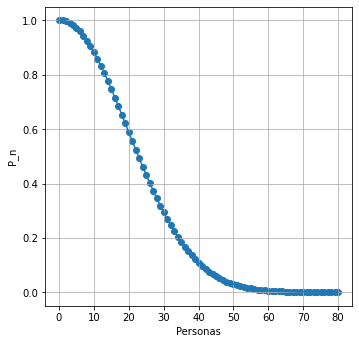

In [32]:
def probabilidad_cumpleaños(n):
    dias=365
    prob=1
    dia=365
    for i in range(n):
        prob*=dia/365
        dia-=1
    return prob

p=[]
n=range(81)
for i in range(81):
    prob=probabilidad_cumpleaños(i)
    p.append(prob)


plt.figure(figsize=(5.5,5.5))
plt.plot(n,p)
plt.scatter(n,p)
plt.xlabel("Personas")
plt.ylabel("P_n")
plt.grid(True)

Ejercicio 8 :

In [12]:
def probabilidad(N):
   f =0
   for i in range(N):
    if np.sum(np.random.choice([1,-1], size =4)) ==0:
        f+=1
   return f/int(N)

round(probabilidad(10**5),3)


0.373

## Distribuciones continuas de probabilidad:

Ejercicio 1

In [15]:
x=sym.Symbol('x', real=True)
y=sym.Symbol('y', real=True)
f=sym.Piecewise((((2/3)*(x+2*y)),((0<=x)&(x<=1)&(0<=y)&(y<=1))),(0,True))
f

Piecewise((0.666666666666667*x + 1.33333333333333*y, (x >= 0) & (y >= 0) & (x <= 1) & (y <= 1)), (0, True))

a)

f es positivo en el intervalo [0,1]x[0,1]

In [18]:
sym.integrate(f,(x,-sym.oo,sym.oo),(y,-sym.oo,sym.oo)) 

1.00000000000000

b)

In [21]:
gx=sym.integrate(f,(y,-sym.oo,sym.oo))
hy=sym.integrate(f,(x,-sym.oo,sym.oo))
gx,hy

(Piecewise((0.666666666666667*x + 0.666666666666667, (x >= 0) & (x <= 1)), (0, True)),
 Piecewise((1.33333333333333*y + 0.333333333333333, (y >= 0) & (y <= 1)), (0, True)))

c)

In [23]:
Ex=sym.integrate(x*gx,(x,-sym.oo,sym.oo))
Ex

0.555555555555556

d)

In [24]:
Ey=sym.integrate(y*hy,(y,-sym.oo,sym.oo))
Ey

0.611111111111111

e)

In [26]:
Exy=sym.integrate(x*y*f,(x,-sym.oo,sym.oo),(y,-sym.oo,sym.oo))
covar=Exy-(Ex*Ey)
covar

-0.00617283950617281

f)

In [33]:
f2=(x-Ex)*(y-Ey)
covar=sym.integrate(f*f2,(x,-sym.oo,sym.oo),(y,-sym.oo,sym.oo))
covar

-0.00617283950617284

g)

In [34]:
independencia=sym.expand((0.666666666666667*x+0.666666666666667)*(1.33333333333333*𝑦+0.333333333333333))
independencia

0.888888888888887*x*y + 0.222222222222222*x + 0.888888888888887*y + 0.222222222222222

Los valores x e y no son independientes, ya que la multiplicación de g(x) por h(y) no es igual a f(x, y), la cual representa la función densidad conjunta. Esto contradice la teoría de la independencia, ya que f(x, y) representa la probabilidad conjunta (A ∪ B) y g(x),h(y) la probabilidad de A y probabilidad de B respectivamente.

# Mínimos cuadrados:

Ejercicio 1b

In [40]:
A=np.array([[2,-1],[1,2],[1,1]])
b=np.array([2,1,4])
h=0.01
x=np.arange(-5,5+h,h)
y=np.arange(-5,5+h,h)

def minima_distancia(A,b):
    distancias=np.zeros((len(x),len(x)))
    x1=[]
    y1=[]
    for i in range(len(x)):
        for j in range(len(y)):
            x_=np.array([x[i],y[j]])
            d=np.linalg.norm(np.dot(A,x_)-b)
            distancias[i,j]=d
    return distancias
d=minima_distancia(A,b)
minimo_punto=np.min(d) 
coord_minima=np.unravel_index(np.argmin(d),d.shape)
xsol = np.array([x[coord_minima[0]], y[coord_minima[1]]])
minimo_punto #Distancia miníma

2.5354683985409867

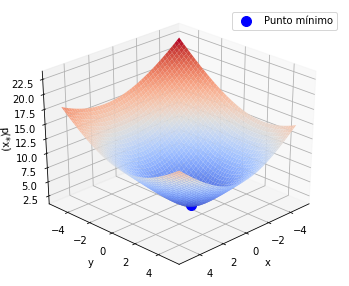

In [41]:
X,Y=np.meshgrid(x,y)
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, d, cmap='coolwarm')
ax.scatter(X[coord_minima], Y[coord_minima], d[coord_minima], color='blue', s=100, label='Punto mínimo')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('p(*x)')
ax.view_init(elev=30, azim=45)
ax.legend()

Ejercicio 7

In [45]:
A=np.array([[3,1,-1],[1,2,0],[0,1,2],[1,1,-1]])
b=np.array([-3,-3,8,9])
M=np.dot(A.T,A)
Ab=np.dot(A.T,b)
xsol=np.linalg.solve(M,Ab)#Mínimos cuadrados
np.dot(A,np.round(xsol)) #Proy_w(b)

array([-2.,  3.,  4.,  0.])

# Estimación de Parametros

Ejercicio 1

## Hidden Markov Models


In [ ]:
import itertools
perm = list(itertools.permutations([0,1]),8)

In [ ]:
T = np.array([[0.8,0.2],[0.2,0.8]])
E = np.array([[0.5,0.9],[0.5,0.1]])
pri = np.array([0.2,0.8])

def most_probable(): 
    maxi = 0
    for i in perm:
        

        
        
    
